## FIRST MODEL
DETECTING MELANOMAS BY COMPUTER VISION


PRUEBAS CON DATASET ORIGINAL HARVARD


Importation of libraries

In [101]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np
import os
from tensorflow.keras.metrics import Precision, Recall

## LOADING AND PREPROCESSING


As we found in the preprocessing part, we have on hte training file:

Total benign images: 6705
Total malignant images: 1113

Where we can see that we have much less data in the malignant folder, so it is advisable to perform data augmentation to more efficiently achieve the balance between classes and thus better learn the characteristics of both classes.

¿Por qué es importante el balance de clases?
Sesgo en el modelo: Si una clase es mucho más frecuente que otra, el modelo puede aprender a "ignorar" las clases minoritarias y simplemente predecir siempre la clase mayoritaria, logrando una alta precisión engañosa (accuracy paradox).

Ejemplo: En un dataset con 95% de clase A y 5% de clase B, un modelo que siempre predice A tendría un 95% de precisión, pero sería inútil para detectar la clase B.

Métricas engañosas: El accuracy (exactitud) no es confiable cuando hay desbalance. Es mejor usar métricas como Precisión, Recall, F1-Score o AUC-ROC.

Sobreajuste en clases minoritarias: Si hay pocos ejemplos de una clase, el modelo puede memorizarlos (overfitting) en lugar de aprender patrones generalizables.

¿Cómo manejar datos desbalanceados?
Oversampling: Aumentar artificialmente las muestras de la clase minoritaria (ej. con SMOTE).

Undersampling: Reducir las muestras de la clase mayoritaria (puede perder información útil).

Pesos en el modelo: Asignar mayor peso a las clases minoritarias durante el entrenamiento (ej. en scikit-learn: class_weight='balanced').

Métricas adecuadas: Usar F1-Score, Matriz de Confusión o Curva ROC en lugar de accuracy.

Algoritmos robustos: Algunos modelos (como Random Forest o XGBoost) manejan mejor el desbalance.

Conclusión
Sí, es ideal que los datos estén balanceados, pero si no es posible, se deben aplicar técnicas de balanceo y elegir métricas adecuadas para evaluar el modelo correctamente.

¿Tienes un caso específico en el que estés trabajando? ¡Podría ayudarte con estrategias concretas!

In [102]:

# Definir directorios
base_dir = r"C:\Users\jakif\CODE\PROYECTO-FINAL\images\PREPROCESSED_DATA_copy"
train_dir = os.path.join(base_dir, 'train')
test_dir = os.path.join(base_dir, 'test')

# Directorios para cada clase

benign_dir = os.path.join(train_dir, 'benign_images')
malignant_dir = os.path.join(train_dir, 'malignant_images')


print(f"Total de imágenes benignas en el train: {len(os.listdir(benign_dir))}")
print(f"Total de imágenes malignas en el train: {len(os.listdir(malignant_dir))}")
print(f"Total de imágenes: ",len(os.listdir(benign_dir)) +len(os.listdir(malignant_dir)) )


# Crear generadores de datos para aumentar el dataset
train_datagen = ImageDataGenerator(
    rescale=1./255,   # Normalización de píxeles
    rotation_range=20, # Rotaciones aleatorias
    width_shift_range=0.2, 
    height_shift_range=0.2, 
    horizontal_flip=True, 
    fill_mode='nearest'
)

test_datagen = ImageDataGenerator(rescale=1./255) # Solo normalización

# Cargar imágenes en lotes
#flow_frome_directory: Carga imágenes de un directorio y las etiquetas de las subcarpetas
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),  # size of the input images (Neural networks require fixed input dimensions)
    batch_size=32,
    class_mode='binary'  # Binary classification (benign o malignant)
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary'
)


Total de imágenes benignas en el train: 6705
Total de imágenes malignas en el train: 1113
Total de imágenes:  7818
Found 7818 images belonging to 2 classes.
Found 1079 images belonging to 2 classes.


We have achived a best balance between the two classes

In [103]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Construcción del modelo CNN
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(224, 224, 3)),
    MaxPooling2D(2,2),
    
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')  # Salida binaria (0: benigno, 1: maligno)
])

# Compilar el modelo
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy', Precision(name='precision'), Recall(name='recall')]
)

# Resumen del modelo
model.summary()


c:\Users\jakif\anaconda3\envs\COMPUTER_VISION\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_18"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_54 (Conv2D)              │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_54 (MaxPooling2D) │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_55 (Conv2D)              │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_55 (MaxPooling2D) │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_56 (Conv2D)              │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_56 (MaxPooling2D) │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_18 (Flatten)            │ (None, 86528)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_36 (Dense)                │ (None, 128)            │    11,075,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_18 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_37 (Dense)                │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,169,089 (42.61 MB)

 Trainable params: 11,169,089 (42.61 MB)

 Non-trainable params: 0 (0.00 B)

In [104]:
history = model.fit(
    train_generator,
    epochs=10,  # Ajusta según sea necesario
    validation_data=test_generator
)

c:\Users\jakif\anaconda3\envs\COMPUTER_VISION\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
245/245 ━━━━━━━━━━━━━━━━━━━━ 120s 485ms/step - accuracy: 0.8449 - loss: 0.4439 - precision: 0.1380 - recall: 0.0205 - val_accuracy: 0.8415 - val_loss: 0.3643 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 2/10
245/245 ━━━━━━━━━━━━━━━━━━━━ 106s 434ms/step - accuracy: 0.8486 - loss: 0.3548 - precision: 0.1503 - recall: 0.0031 - val_accuracy: 0.8415 - val_loss: 0.3766 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 3/10
245/245 ━━━━━━━━━━━━━━━━━━━━ 108s 439ms/step - accuracy: 0.8600 - loss: 0.3402 - precision: 0.2897 - recall: 0.0029 - val_accuracy: 0.8415 - val_loss: 0.3681 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 4/10
245/245 ━━━━━━━━━━━━━━━━━━━━ 110s 450ms/step - accuracy: 0.8519 - loss: 0.3440 - precision: 0.4809 - recall: 0.0020 - val_accuracy: 0.8415 - val_loss: 0.3548 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 5/10
245/245 ━━━━━━━━━━━━━━━━━━━━ 113s 460ms/step - accuracy: 0.8554 - loss: 0.3250 - precision: 0.0000e+0

In [105]:
#guardar los pesos
model.save_weights('melanoma_model_1_harvard.weights.h5')

34/34 ━━━━━━━━━━━━━━━━━━━━ 5s 146ms/step - accuracy: 0.8549 - loss: 0.3013 - precision: 0.0000e+00 - recall: 0.0000e+00

    loss: 0.3264
    Accuracy: 84.15%
    Precision: 0.00%
    Recall: 0.00%



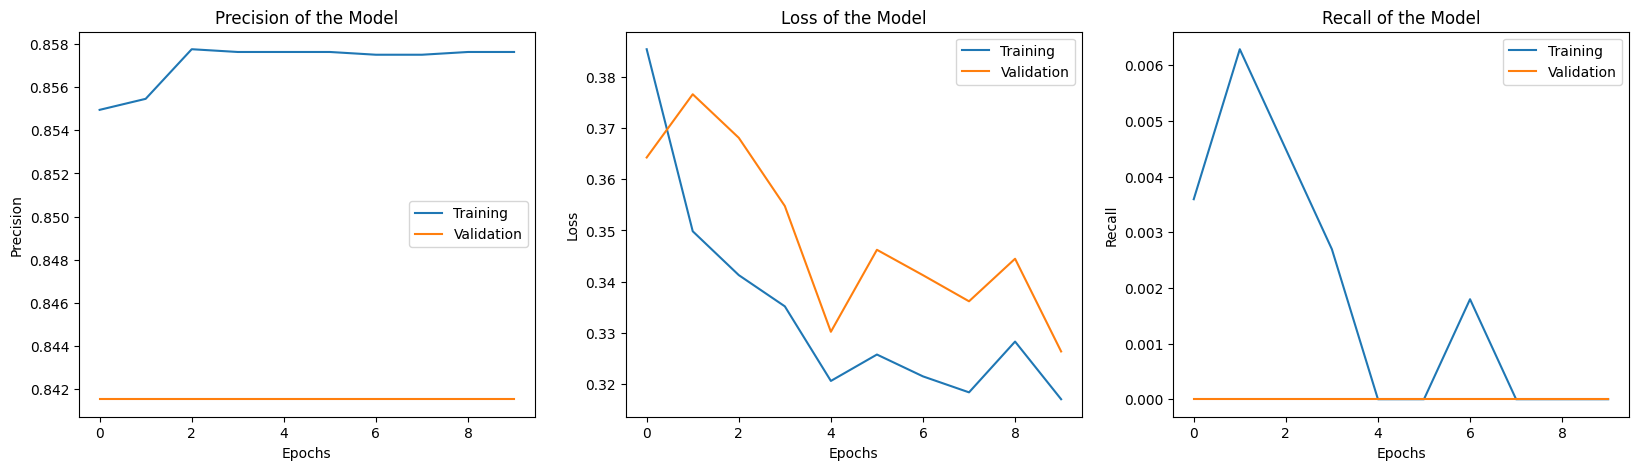

In [106]:
results = model.evaluate(test_generator)  # Devuelve [loss, accuracy, precision, recall]
print(f'''
    loss: {results[0]:.4f}
    Accuracy: {results[1]*100:.2f}%
    Precision: {results[2]*100:.2f}%
    Recall: {results[3]*100:.2f}%
''')




# Adjusting the layout to include a third subplot
plt.figure(figsize=(20, 5))

# Precision
plt.subplot(1, 3, 1)
plt.plot(history.history['accuracy'], label='Training')
plt.plot(history.history['val_accuracy'], label='Validation')
plt.xlabel('Epochs')
plt.ylabel('Precision')
plt.legend()
plt.title('Precision of the Model')

# Loss
plt.subplot(1, 3, 2)
plt.plot(history.history['loss'], label='Training')
plt.plot(history.history['val_loss'], label='Validation')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss of the Model')

# Recall
plt.subplot(1, 3, 3)
plt.plot(history.history['recall'], label='Training')  # Corrected key to 'recall'
plt.plot(history.history['val_recall'], label='Validation')
plt.xlabel('Epochs')
plt.ylabel('Recall')
plt.legend()
plt.title('Recall of the Model')

plt.show()



34/34 ━━━━━━━━━━━━━━━━━━━━ 5s 152ms/step
F1 Score: 0.00
                  precision    recall  f1-score   support

   benign_images       0.84      1.00      0.91       908
malignant_images       0.00      0.00      0.00       171

        accuracy                           0.84      1079
       macro avg       0.42      0.50      0.46      1079
    weighted avg       0.71      0.84      0.77      1079



c:\Users\jakif\anaconda3\envs\COMPUTER_VISION\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\jakif\anaconda3\envs\COMPUTER_VISION\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\jakif\anaconda3\envs\COMPUTER_VISION\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitaliz

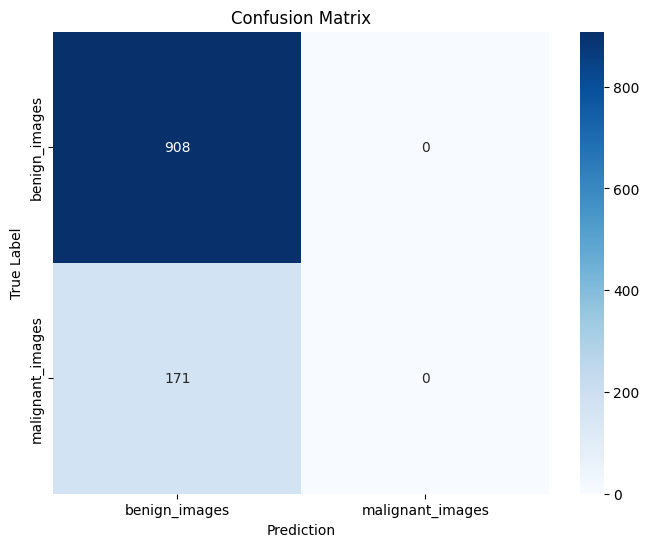

In [107]:
#Evaluar con F1 Score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Obtener las predicciones del modelo y las etiquetas verdaderas
y_true = test_generator.classes
y_pred = model.predict(test_generator)
y_pred = np.round(y_pred).flatten()
# Calcular el F1 Score
f1 = f1_score(y_true, y_pred)
print(f'F1 Score: {f1:.2f}')
# Imprimir el informe de clasificación
print(classification_report(y_true, y_pred, target_names=test_generator.class_indices.keys()))
# Matriz de confusión
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=test_generator.class_indices.keys(), yticklabels=test_generator.class_indices.keys())
plt.xlabel('Prediction')
plt.ylabel('True Label')

plt.title('Confusion Matrix')
plt.show()